In [1]:
# imports 
import os
import pandas as pd
import numpy as np

# load data
train = pd.read_csv('../data/processed/train_data_processed.csv')
test = pd.read_csv('../data/processed/test_data_processed.csv')
val = pd.read_csv('../data/processed/val_data_processed.csv')

In [2]:
# more feature engineering
# use encoder to encode OCCURRED_ON_DATE column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['OCCURRED_ON_DATE'] = le.fit_transform(train['OCCURRED_ON_DATE'])
test['OCCURRED_ON_DATE'] = le.transform(test['OCCURRED_ON_DATE'])
val['OCCURRED_ON_DATE'] = le.transform(val['OCCURRED_ON_DATE'])

In [3]:
# save le 
import joblib
joblib.dump(le, '../models/datetime_encoder.pkl')

['../models/datetime_encoder.pkl']

In [4]:
#drop _id column

test = test.drop('_id', axis=1)
val = val.drop('_id', axis=1)

In [5]:
# define the target variable
y_train = train['Severe_crimes']
y_test = test['Severe_crimes']
y_val = val['Severe_crimes']

# define the features
X_train = train.drop(['Severe_crimes'], axis=1)
X_test = test.drop(['Severe_crimes'], axis=1)
X_val = val.drop(['Severe_crimes'], axis=1)

In [10]:
# build a CNN model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/50
964/964 [==============================] - 2s 1ms/step - loss: 7.9325 - accuracy: 0.8982 - val_loss: 0.1805 - val_accuracy: 0.9365
Epoch 2/50
964/964 [==============================] - 1s 1ms/step - loss: 0.3513 - accuracy: 0.9305 - val_loss: 0.1896 - val_accuracy: 0.9365
Epoch 3/50
964/964 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.9317 - val_loss: 0.1779 - val_accuracy: 0.9365
Epoch 4/50
964/964 [==============================] - 1s 1ms/step - loss: 0.2312 - accuracy: 0.9321 - val_loss: 0.1800 - val_accuracy: 0.9365
Epoch 5/50
964/964 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9322 - val_loss: 0.1875 - val_accuracy: 0.9365
Epoch 6/50
964/964 [==============================] - 1s 1ms/step - loss: 0.2030 - accuracy: 0.9323 - val_loss: 0.1539 - val_accuracy: 0.9365
Epoch 7/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1804 - accuracy: 0.9323 - val_loss: 0.1323 - val_accuracy: 0.9365
Epoch 

In [11]:
# use the model on validation data and evaluate
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)
print('F1 Score:', f1)




484/484 [==============================] - 0s 795us/step
Accuracy: 0.9791855203619909
Confusion Matrix: [[14274   213]
 [  109   874]]
F1 Score: 0.8444444444444444


In [13]:
# build a deeper CNN model
model_deeper = Sequential()
model_deeper.add(Dense(512, input_dim=7, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(256, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(128, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(64, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(32, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(1, activation='sigmoid'))




# compile the model
model_deeper.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_deeper.summary()

# fit the model
history_deeper = model_deeper.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               4096      
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)               

In [14]:
# use the model on validation data and evaluate
y_pred = model_deeper.predict(X_val)
y_pred = (y_pred > 0.5)

# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)
print('F1 Score:', f1)

484/484 [==============================] - 1s 1ms/step
Accuracy: 0.9641887524240466
Confusion Matrix: [[14004   483]
 [   71   912]]
F1 Score: 0.7670311185870479


In [16]:

# test different dropout rates
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
f1_scores = []

for rate in dropout_rates:
    model = Sequential()
    model.add(Dense(64, input_dim=7, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

    # use the model on validation data and evaluate
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5)

    # f1 score
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)

print(f1_scores)







Epoch 1/50
964/964 [==============================] - 2s 2ms/step - loss: 0.4434 - accuracy: 0.9244 - val_loss: 0.1218 - val_accuracy: 0.9410
Epoch 2/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1362 - accuracy: 0.9379 - val_loss: 0.0995 - val_accuracy: 0.9589
Epoch 3/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1198 - accuracy: 0.9512 - val_loss: 0.0948 - val_accuracy: 0.9665
Epoch 4/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1116 - accuracy: 0.9600 - val_loss: 0.0952 - val_accuracy: 0.9636
Epoch 5/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1042 - accuracy: 0.9656 - val_loss: 0.0901 - val_accuracy: 0.9767
Epoch 6/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1013 - accuracy: 0.9679 - val_loss: 0.0866 - val_accuracy: 0.9749
Epoch 7/50
964/964 [==============================] - 1s 1ms/step - loss: 0.0948 - accuracy: 0.9709 - val_loss: 0.0858 - val_accuracy: 0.9742
Epoch 

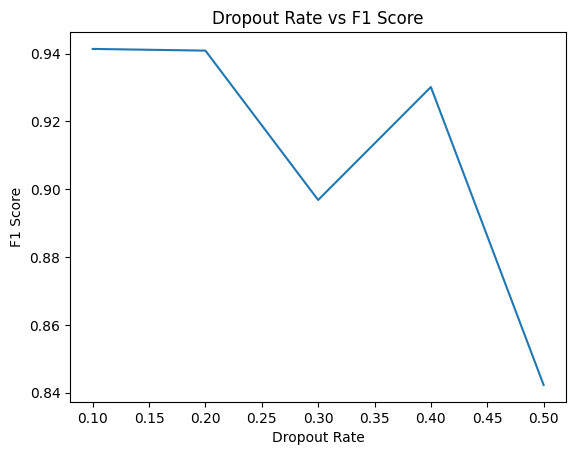

In [17]:
# draw the dropout rates vs f1 scores
import matplotlib.pyplot as plt
plt.plot(dropout_rates, f1_scores)
plt.xlabel('Dropout Rate')
plt.ylabel('F1 Score')
plt.title('Dropout Rate vs F1 Score')
plt.show()



In [18]:
# final model, use a 0.15 dropout rate
model_final = Sequential()
model_final.add(Dense(1024, input_dim=7, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(512, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(256, activation='relu'))

model_final.add(Dropout(0.15))
model_final.add(Dense(128, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(64, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(32, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(1, activation='sigmoid'))

# compile the model
model_final.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_final.summary()

# fit the model
history_final = model_final.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 1024)              8192      
                                                                 
 dropout_32 (Dropout)        (None, 1024)              0         
                                                                 
 dense_47 (Dense)            (None, 512)               524800    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_48 (Dense)            (None, 256)               131328    
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 128)             

In [19]:
# f1 score
y_pred = model_final.predict(X_val)
y_pred = (y_pred > 0.5)
f1 = f1_score(y_val, y_pred)
print('F1 Score:', f1)


484/484 [==============================] - 1s 2ms/step
F1 Score: 0.9313371192565824
